<a href="https://colab.research.google.com/github/Katiaalves/Machine_Learnig/blob/main/Calssifica%C3%A7%C3%A3o_roupas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [1]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model

*Carregando o Dataset*

In [15]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

Exibição dos dados


In [ ]:

#len(imagens_treino)
imagens_treino.shape
imagens_teste.shape
len(identificacoes_teste)
identificacoes_treino.min()
identificacoes_treino.max()

total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta','Calça', 'Pullover','Vestido','Casaco','Sandalia','Camisa','Tenis','Bolsa','Bota']
'''
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])
for imagem in range(10):
  plt.subplot(2,5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])
'''

plt.imshow(imagens_treino[0])
plt.colorbar()

Normalizando as imagens

In [16]:


imagens_treino = imagens_treino/float(255)



Criando, compilando,Treinando e normalizando  MOdelo





In [ ]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape =(28,28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dense(10, activation= tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics =['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs= 5, validation_split= 0.2)

**Salvando** **o** **Modelo** **Treinado**

In [11]:

modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

**Visualizando as acurácias de treino e validação por época**

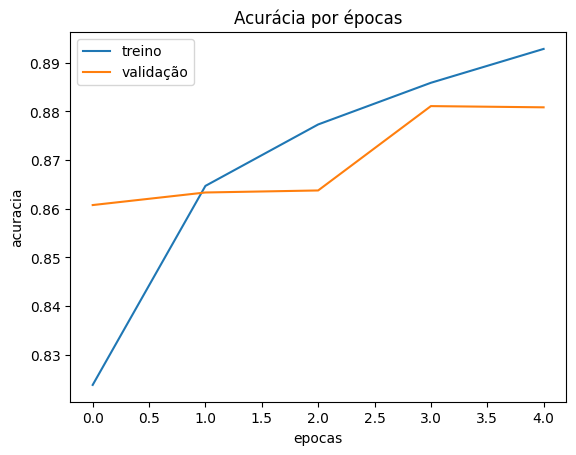

In [6]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('epocas')
plt.ylabel('acuracia')
plt.legend(['treino', 'validação'])

**Visualizando as perdas de treino e validação por epocas**

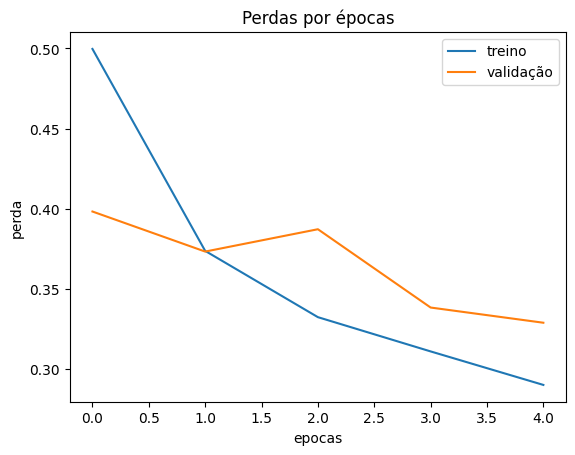

In [7]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perdas por épocas')
plt.xlabel('epocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

**Testando o modelo e o modelo salvo**

In [14]:
testes = modelo.predict(imagens_teste)
print('resultado do teste:', np.argmax(testes[1]))
print('número da imagem de teste:', identificacoes_teste[1])

teste_modelo_salvo = modelo_salvo(imagens_teste)
print('resultado teste modelo salvo:', np.argmax(teste_modelo_salvo[1]))
print('numero da imagem de teste:', identificacoes_teste[1])

313/313 [==============================] - 1s 4ms/step
resultado do teste: 2
número da imagem de teste: 2
resultado teste modelo salvo: 2
numero da imagem de teste: 2


**Avaliando o modelo**

In [9]:
perda_teste, accuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste :', perda_teste)
print('Acuaracia do teste :' , accuracia_teste)


313/313 [==============================] - 1s 2ms/step - loss: 60.5241 - accuracy: 0.8585
Perda do teste : 60.524112701416016
Acuaracia do teste : 0.8585000038146973
